In [1]:
#exercise on https://milliams.com/courses/applied_data_analysis/Hyperparameters.html
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = DataFrame(load_iris().data, columns=load_iris().feature_names)
X = X[["sepal length (cm)", "sepal width (cm)"]]  # Grab just two of the features
y = load_iris().target

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    "n_neighbors" : range(1, 40),
}
clf = GridSearchCV(KNeighborsClassifier(), hyperparameters).fit(train_X, train_y)

In [3]:
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
17,18,0.795652,0.049044,1
30,31,0.795652,0.056227,1
28,29,0.795257,0.042471,3
26,27,0.794862,0.033641,4
27,28,0.786561,0.048231,5


<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

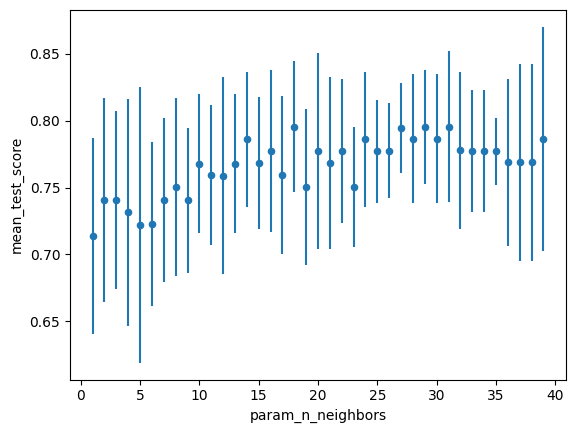

In [4]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

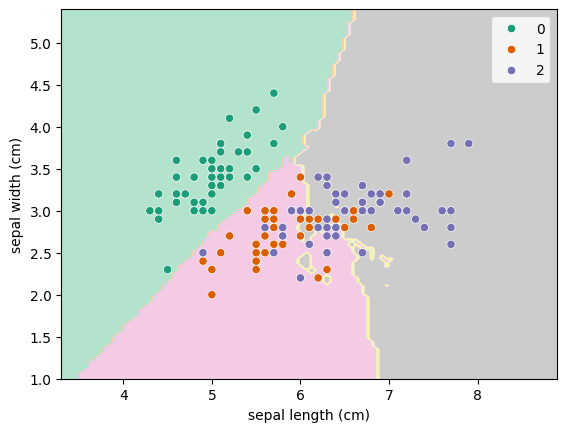

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

DecisionBoundaryDisplay.from_estimator(clf, X, cmap="Pastel2")
sns.scatterplot(data=X, x="sepal length (cm)", y="sepal width (cm)", hue=y, palette="Dark2")

In [6]:
clf.score(test_X, test_y)

0.7894736842105263